base of tth data https://github.com/pcm-dpc/COVID-19

definitions https://github.com/pcm-dpc/COVID-19/blob/master/dati-andamento-covid19-italia.md#dati-per-regione

In [18]:
import pandas as pd
from datetime import datetime

def parse_date(date):
    return datetime.strptime(date[:10], '%Y-%m-%d')

regions_raw_data = pd.read_csv(
    'https://raw.githubusercontent.com/pcm-dpc/COVID-19/master/dati-regioni/dpc-covid19-ita-regioni.csv',
    parse_dates=['data'],
    date_parser=parse_date)

Piedmont_raw_data=regions_raw_data[regions_raw_data.denominazione_regione=='Piemonte']
Piedmont_raw_data=Piedmont_raw_data.rename(columns = {'data': 'dates'},inplace = False)


In [2]:
Piedmont_raw_data.columns

Index(['dates', 'stato', 'codice_regione', 'denominazione_regione', 'lat',
       'long', 'ricoverati_con_sintomi', 'terapia_intensiva',
       'totale_ospedalizzati', 'isolamento_domiciliare', 'totale_positivi',
       'variazione_totale_positivi', 'nuovi_positivi', 'dimessi_guariti',
       'deceduti', 'casi_da_sospetto_diagnostico', 'casi_da_screening',
       'totale_casi', 'tamponi', 'casi_testati', 'note'],
      dtype='object')

# definitions
### from the [Protezione Civile](https://github.com/pcm-dpc/COVID-19/blob/master/dati-andamento-covid19-italia.md#dati-per-regione) web site [in square brakets my addenda]   
   
**ricoverati_con_sintomi**  

**terapia_intensiva**  
  
**totale_ospedalizzati**  
  
**isolamento_domiciliare**  
  
**totale_positivi** [stock in a given day]  
  
**variazione_totale_positivi** first difference of totale_positivi]  
  
**nuovi_positivi**  
  
**dimessi_guariti**  

**deceduti**  
  
**casi_da_sospetto_diagnostico**  
  
**casi_da_screening**  
  
**totale_casi** [cumulative value]  
  
**tamponi**  
  
**casi_testati**  



In [3]:
# beginning of May
print(Piedmont_raw_data[70:71][['dates','ricoverati_con_sintomi', 'terapia_intensiva',
       'totale_ospedalizzati', 'isolamento_domiciliare', 'totale_positivi',
       'variazione_totale_positivi', 'nuovi_positivi', 'dimessi_guariti',
       'deceduti', 'casi_da_sospetto_diagnostico', 'casi_da_screening',
       'totale_casi', 'tamponi', 'casi_testati']].head())

          dates  ricoverati_con_sintomi  terapia_intensiva  \
1483 2020-05-04                    2391                161   

      totale_ospedalizzati  isolamento_domiciliare  totale_positivi  \
1483                  2552                   13010            15562   

      variazione_totale_positivi  nuovi_positivi  dimessi_guariti  deceduti  \
1483                         -76             192             8874      3186   

      casi_da_sospetto_diagnostico  casi_da_screening  totale_casi  tamponi  \
1483                           NaN                NaN        27622   176078   

      casi_testati  
1483      123801.0  


In [4]:
# verification 'totale_positivi'='ricoverati_con_sintomi'+'terapia_intensiva'+'isolamento_domiciliare'
2391+161+13010

15562

In [5]:
# verification 'totale_casi'='totale_positivi'+'dimessi_guariti'+'deceduti'
15562+8874+3186

27622

In [6]:
# beginning of November
print(Piedmont_raw_data[252:253][['dates','ricoverati_con_sintomi', 'terapia_intensiva',
       'totale_ospedalizzati', 'isolamento_domiciliare', 'totale_positivi',
       'variazione_totale_positivi', 'nuovi_positivi', 'dimessi_guariti',
       'deceduti', 'casi_da_sospetto_diagnostico', 'casi_da_screening',
       'totale_casi', 'tamponi', 'casi_testati']].head())

          dates  ricoverati_con_sintomi  terapia_intensiva  \
5305 2020-11-02                    3108                196   

      totale_ospedalizzati  isolamento_domiciliare  totale_positivi  \
5305                  3304                   32791            36095   

      variazione_totale_positivi  nuovi_positivi  dimessi_guariti  deceduti  \
5305                        1681            2003            34153      4415   

      casi_da_sospetto_diagnostico  casi_da_screening  totale_casi  tamponi  \
5305                       34275.0            40388.0        74663  1050421   

      casi_testati  
5305      652762.0  


In [7]:
# verification 'totale_positivi'='ricoverati_con_sintomi'+'terapia_intensiva'+'isolamento_domiciliare'
3108+196+32791

36095

In [8]:
# verification 'totale_casi'='totale_positivi'+'dimessi_guariti'+'deceduti'
36095+34153+4415

74663

In [9]:
# but also
# verification 'totale_casi'='casi_da_sospetto_diagnostico'+'casi_da_screening'
34275+40388

74663

<AxesSubplot:title={'center':'Figure 1'}, xlabel='dates'>

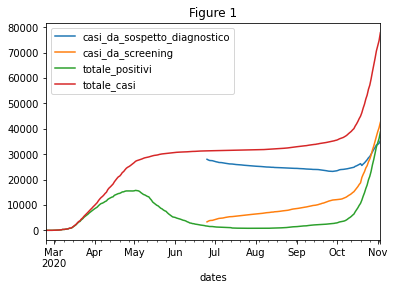

In [10]:
Piedmont_raw_data.plot(x='dates',y=['casi_da_sospetto_diagnostico','casi_da_screening',
                                    'totale_positivi','totale_casi'], title="Figure 1")

# Figure 1



**totale_positivi (@)**  
Totale attualmente positivi (ospedalizzati + isolamento domiciliare)  
Total amount of current positive cases (Hospitalised patients + Home confinement)  
**totale_casi (#)**  
Totale casi positivi  
Total amount of positive cases  
**(@)** contains   
**(#)** contains

Verification in the two examples below.


<AxesSubplot:title={'center':'Figure 2'}, xlabel='dates'>

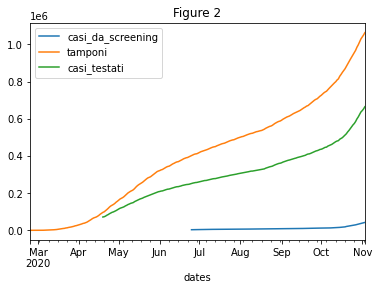

In [11]:
Piedmont_raw_data.plot(x='dates',y=['casi_da_screening','tamponi', 'casi_testati'], title="Figure 2")

In [12]:
Piedmont_raw_data[-30:][['dates','casi_da_screening','tamponi', 
                        'casi_testati']].describe()

,casi_da_screening,tamponi,casi_testati
count,30.000000,3.000000e+01,30.000000
mean,22731.100000,8.881454e+05,533405.700000
std,9487.268116,9.827333e+04,67498.888684
min,12368.000000,7.480610e+05,447344.000000
25%,14493.500000,8.017165e+05,477780.000000
50%,19730.000000,8.752790e+05,515358.500000
75%,29237.750000,9.649102e+05,582599.750000
max,42521.000000,1.063115e+06,664753.000000


In [13]:
# mean % of postivivity in screening
100*21722.5/526129.733333

4.1287345351857

In [19]:
# last value
print(100*Piedmont_raw_data[-1:][['casi_da_screening']].values[0][0] / \
    Piedmont_raw_data[-1:][['casi_testati']].values[0][0], "day ", 
    Piedmont_raw_data[-1:][['dates']].values[0][0])

6.396511185357569 day  2020-11-03T00:00:00.000000000
